In [ ]:
import pandas as pd

df = pd.read_csv('heart_disease.csv')
print(df.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


🔹 Dataset Shape: (1190, 12)

🔹 Data Types and Non-null Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None

🔹 Basic Statistics:
               age          sex  chest pain type  res

C:\Users\Ilyes\AppData\Local\Temp\ipykernel_19296\3533208990.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


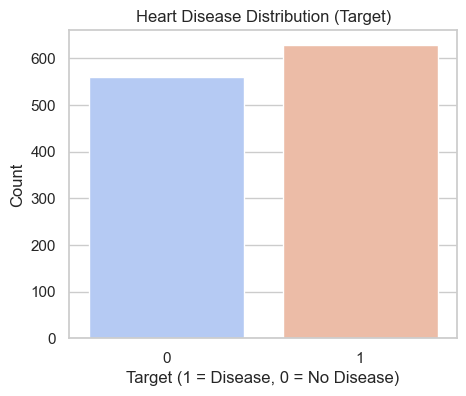

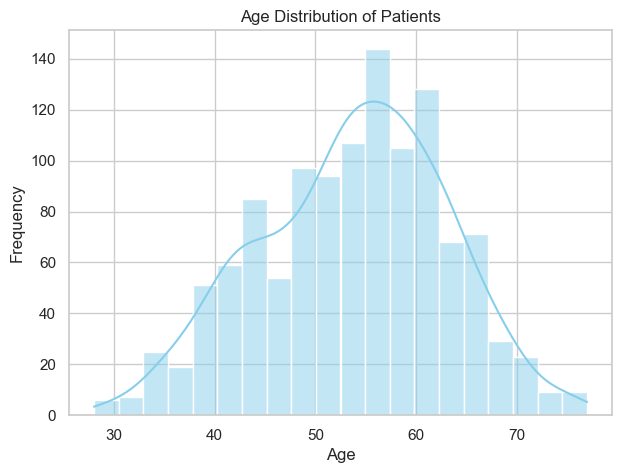

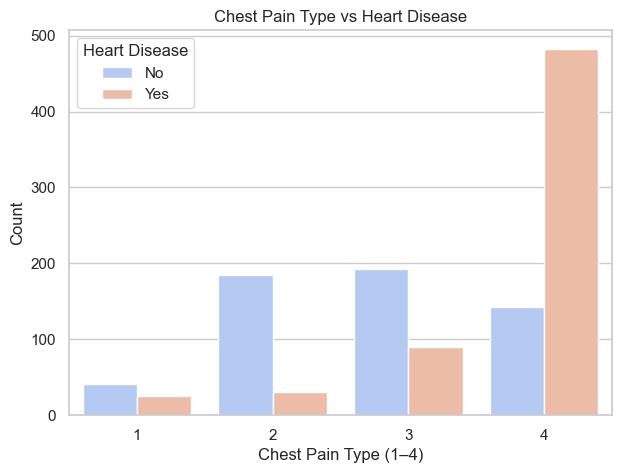

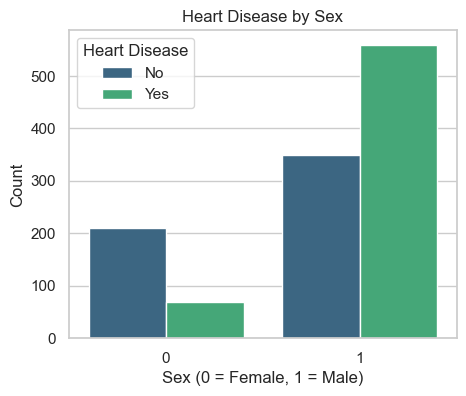

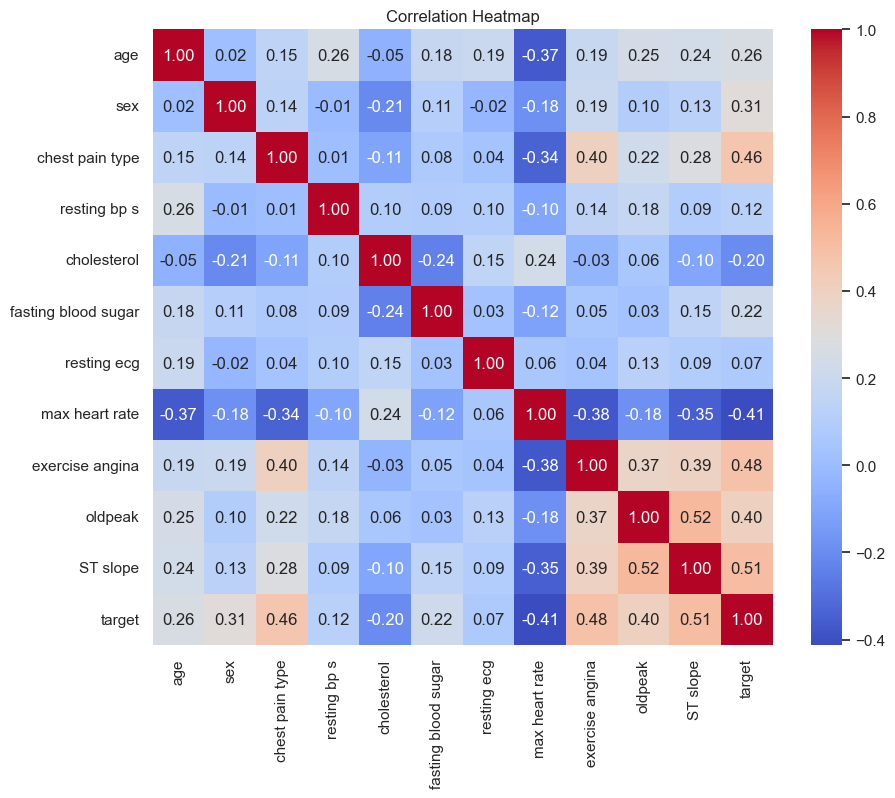

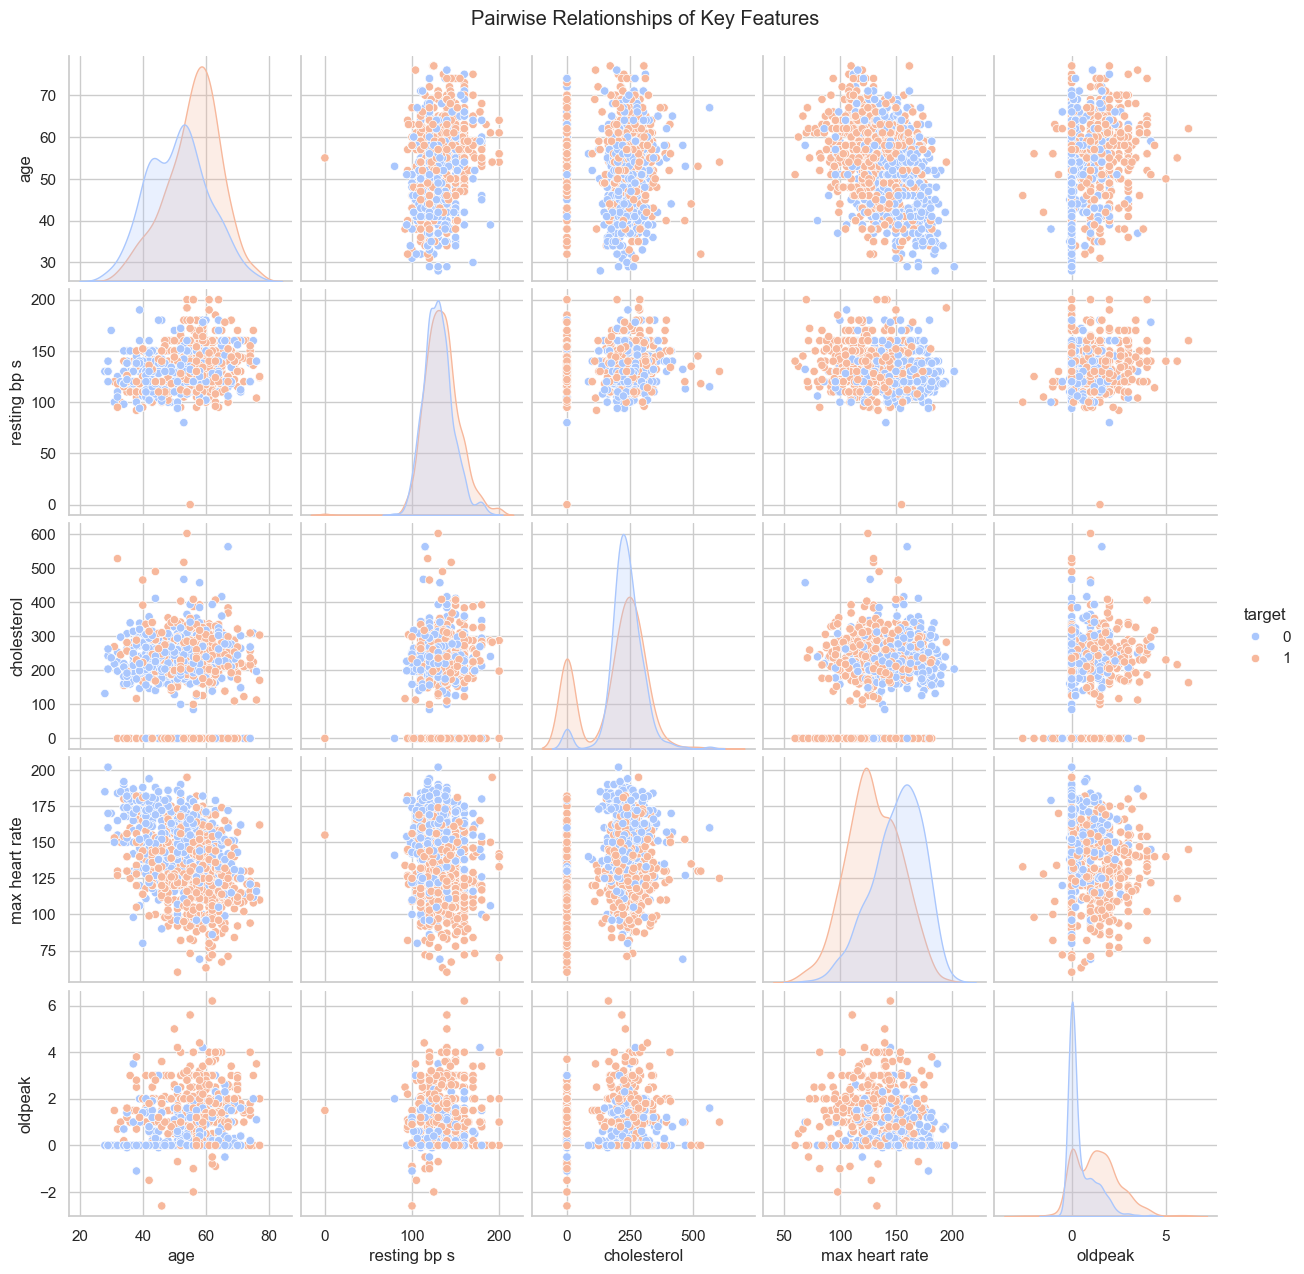

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('heart_disease.csv')

# --- BASIC INFO ---
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Data Types and Non-null Info:")
print(df.info())
print("\n🔹 Basic Statistics:")
print(df.describe())
print("\n🔹 Target Class Distribution:")
print(df['target'].value_counts())

# --- VISUALIZATIONS ---

sns.set(style="whitegrid", palette="pastel")

# 1️⃣ Target distribution (Heart Disease vs No Disease)
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Heart Disease Distribution (Target)')
plt.xlabel('Target (1 = Disease, 0 = No Disease)')
plt.ylabel('Count')
plt.show()

# 2️⃣ Age distribution
plt.figure(figsize=(7,5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3️⃣ Chest pain type vs target
plt.figure(figsize=(7,5))
sns.countplot(x='chest pain type', hue='target', data=df, palette='coolwarm')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (1–4)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# 4️⃣ Sex vs target
plt.figure(figsize=(5,4))
sns.countplot(x='sex', hue='target', data=df, palette='viridis')
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# 5️⃣ Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 6️⃣ Pairplot of main numeric features
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
sns.pairplot(df[numeric_features + ['target']], hue='target', palette='coolwarm')
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()


🔹 Dataset Shape: (1190, 12)

🔹 Missing Values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

🔹 Target Distribution:
 target
1    629
0    561
Name: count, dtype: int64

🔹 Logistic Regression 🔹
Accuracy: 0.8403
ROC-AUC: 0.9041
Confusion Matrix:
 [[ 92  20]
 [ 18 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238


🔹 Random Forest 🔹
Accuracy: 0.9286
ROC-AUC: 0.9731
Confusion Matrix:
 [[103   9]
 [  8 118]]
Classification Rep

C:\Users\Ilyes\AppData\Local\Temp\ipykernel_19296\1859653891.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")


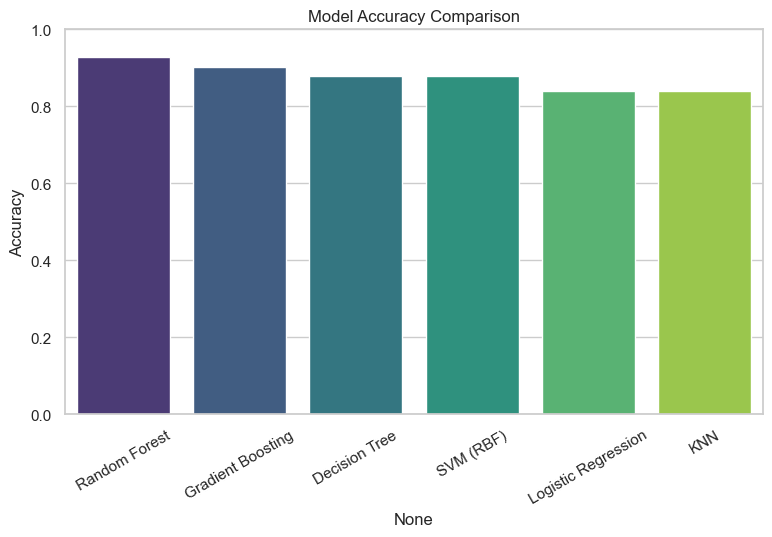

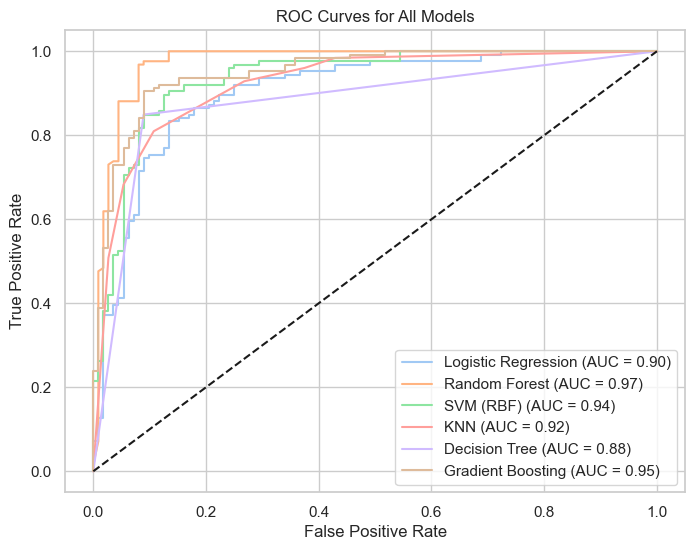

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease.csv")

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Target Distribution:\n", df["target"].value_counts())

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Scale Numeric Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", C=1, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# --- Train and Evaluate ---
results = {}

for name, model in models.items():
    if "SVM" in name or "KNN" in name or "Logistic" in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Accuracy": acc, "AUC": auc}
    
    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", round(acc, 4))
    if auc:
        print("ROC-AUC:", round(auc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Compare Accuracy ---
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

print("\n🏁 Final Model Comparison:")
print(results_df)

# --- Visualization ---
plt.figure(figsize=(9,5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")
plt.xticks(rotation=30)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# --- Optional ROC Curve Plot ---
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        if "SVM" in name or "KNN" in name or "Logistic" in name:
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


🔹 Dataset Shape: (1190, 12)

🔹 Missing Values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

🔹 Target Distribution:
 target
1    629
0    561
Name: count, dtype: int64

🔹 Logistic Regression 🔹
Accuracy: 0.8403
ROC-AUC: 0.905
Confusion Matrix:
 [[ 92  20]
 [ 18 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238


🔹 Random Forest 🔹
Accuracy: 0.9286
ROC-AUC: 0.9731
Confusion Matrix:
 [[103   9]
 [  8 118]]
Classification Repo

C:\Users\Ilyes\AppData\Local\Temp\ipykernel_27940\3696179757.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")


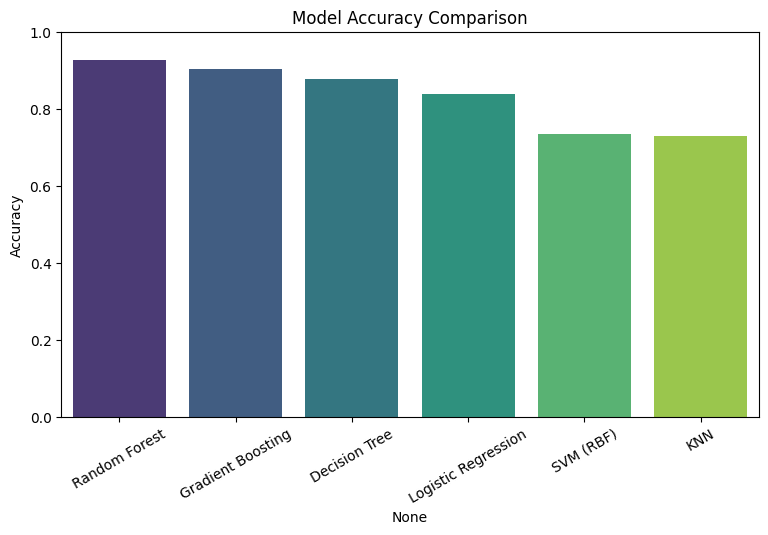

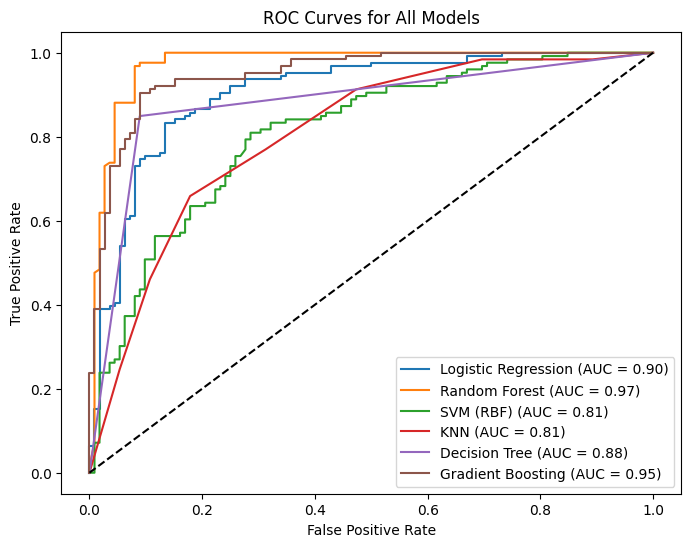

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease.csv")

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Target Distribution:\n", df["target"].value_counts())

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", C=1, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# --- Train and Evaluate ---
results = {}

for name, model in models.items():
    if "SVM" in name or "KNN" in name or "Logistic" in name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Accuracy": acc, "AUC": auc}
    
    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", round(acc, 4))
    if auc:
        print("ROC-AUC:", round(auc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Compare Accuracy ---
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

print("\n🏁 Final Model Comparison:")
print(results_df)

# --- Visualization ---
plt.figure(figsize=(9,5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")
plt.xticks(rotation=30)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# --- Optional ROC Curve Plot ---
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        if "SVM" in name or "KNN" in name or "Logistic" in name:
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



🔹 Dataset Shape: (1190, 12)

🔹 Missing Values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

🔹 Target Distribution:
 target
1    629
0    561
Name: count, dtype: int64

🔹 Logistic Regression 🔹
Accuracy: 0.8403
ROC-AUC: 0.9053
Confusion Matrix:
 [[ 92  20]
 [ 18 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



C:\Users\Ilyes\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Random Forest 🔹
Accuracy: 0.9244
ROC-AUC: 0.9687
Confusion Matrix:
 [[103   9]
 [  9 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       112
           1       0.93      0.93      0.93       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238


🔹 SVM (RBF) 🔹
Accuracy: 0.7353
ROC-AUC: 0.8112
Confusion Matrix:
 [[83 29]
 [34 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       112
           1       0.76      0.73      0.74       126

    accuracy                           0.74       238
   macro avg       0.73      0.74      0.73       238
weighted avg       0.74      0.74      0.74       238


🔹 KNN 🔹
Accuracy: 0.7353
ROC-AUC: 0.8147
Confusion Matrix:
 [[81 31]
 [32 94]]
Classification Report:
               

C:\Users\Ilyes\AppData\Local\Temp\ipykernel_27940\512109429.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")


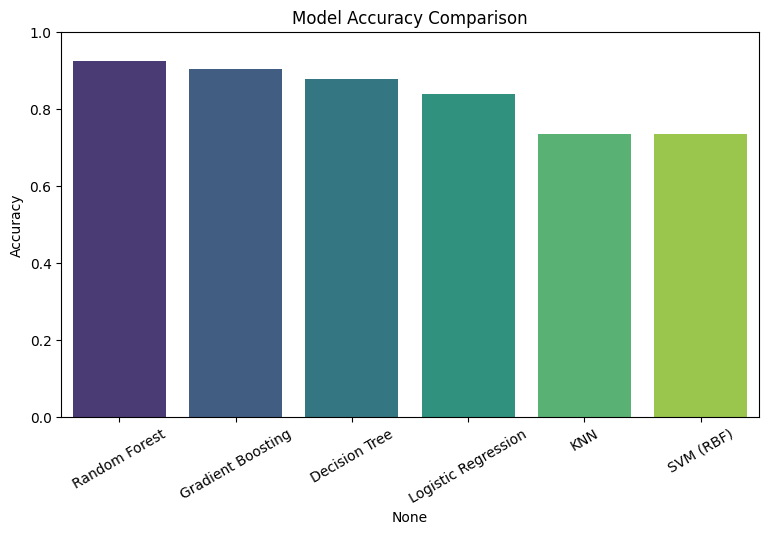

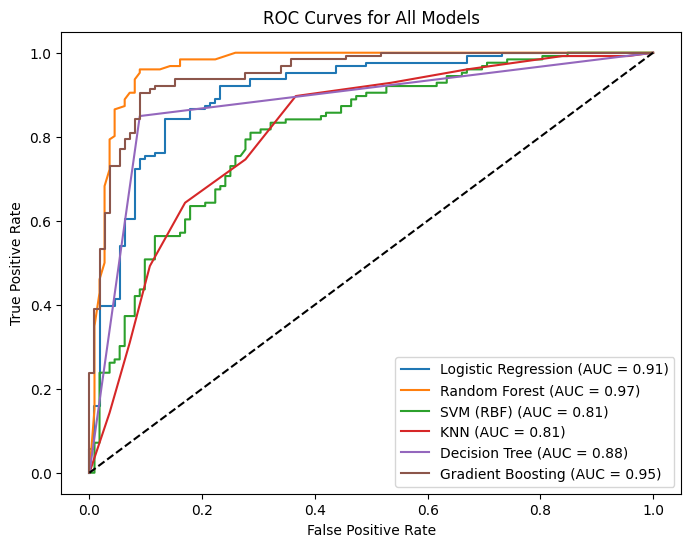

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease.csv")

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Target Distribution:\n", df["target"].value_counts())

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", C=1, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# --- Train and Evaluate ---
results = {}

for name, model in models.items():
    if "SVM" in name or "KNN" in name or "Logistic" in name:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Accuracy": acc, "AUC": auc}
    
    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", round(acc, 4))
    if auc:
        print("ROC-AUC:", round(auc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Compare Accuracy ---
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

print("\n🏁 Final Model Comparison:")
print(results_df)

# --- Visualization ---
plt.figure(figsize=(9,5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")
plt.xticks(rotation=30)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# --- Optional ROC Curve Plot ---
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        if "SVM" in name or "KNN" in name or "Logistic" in name:
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

